In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/telecom_clientes_tratado.csv')
df['Charges.Total'].fillna(df['Charges.Total'].mean(), inplace=True)
df.head()

/tmp/ipython-input-786784755.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(df['Charges.Total'].mean(), inplace=True)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


Distribución porcentual de churn:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


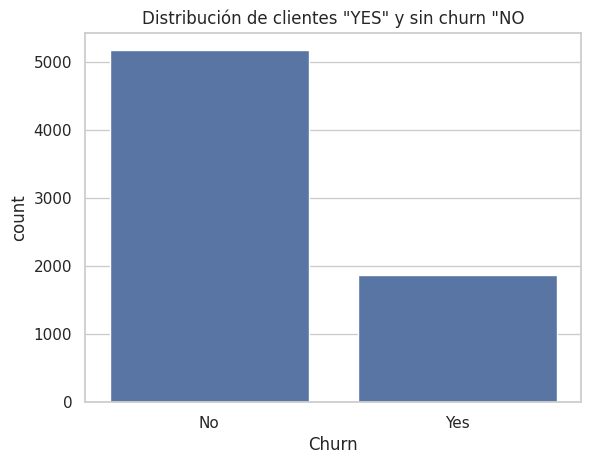

In [20]:
df.drop(columns=['customerID'], inplace=True, errors='ignore')
churn_rate = df['Churn'].value_counts(normalize=True)
print('Distribución porcentual de churn:')
print(churn_rate)
sns.countplot(x='Churn', data=df)
plt.title('Distribución de clientes "YES" y sin churn "NO')
plt.show()

In [21]:
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']
df_encoded.head()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.6,593.30,False,False,True,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,True,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,True,True,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True


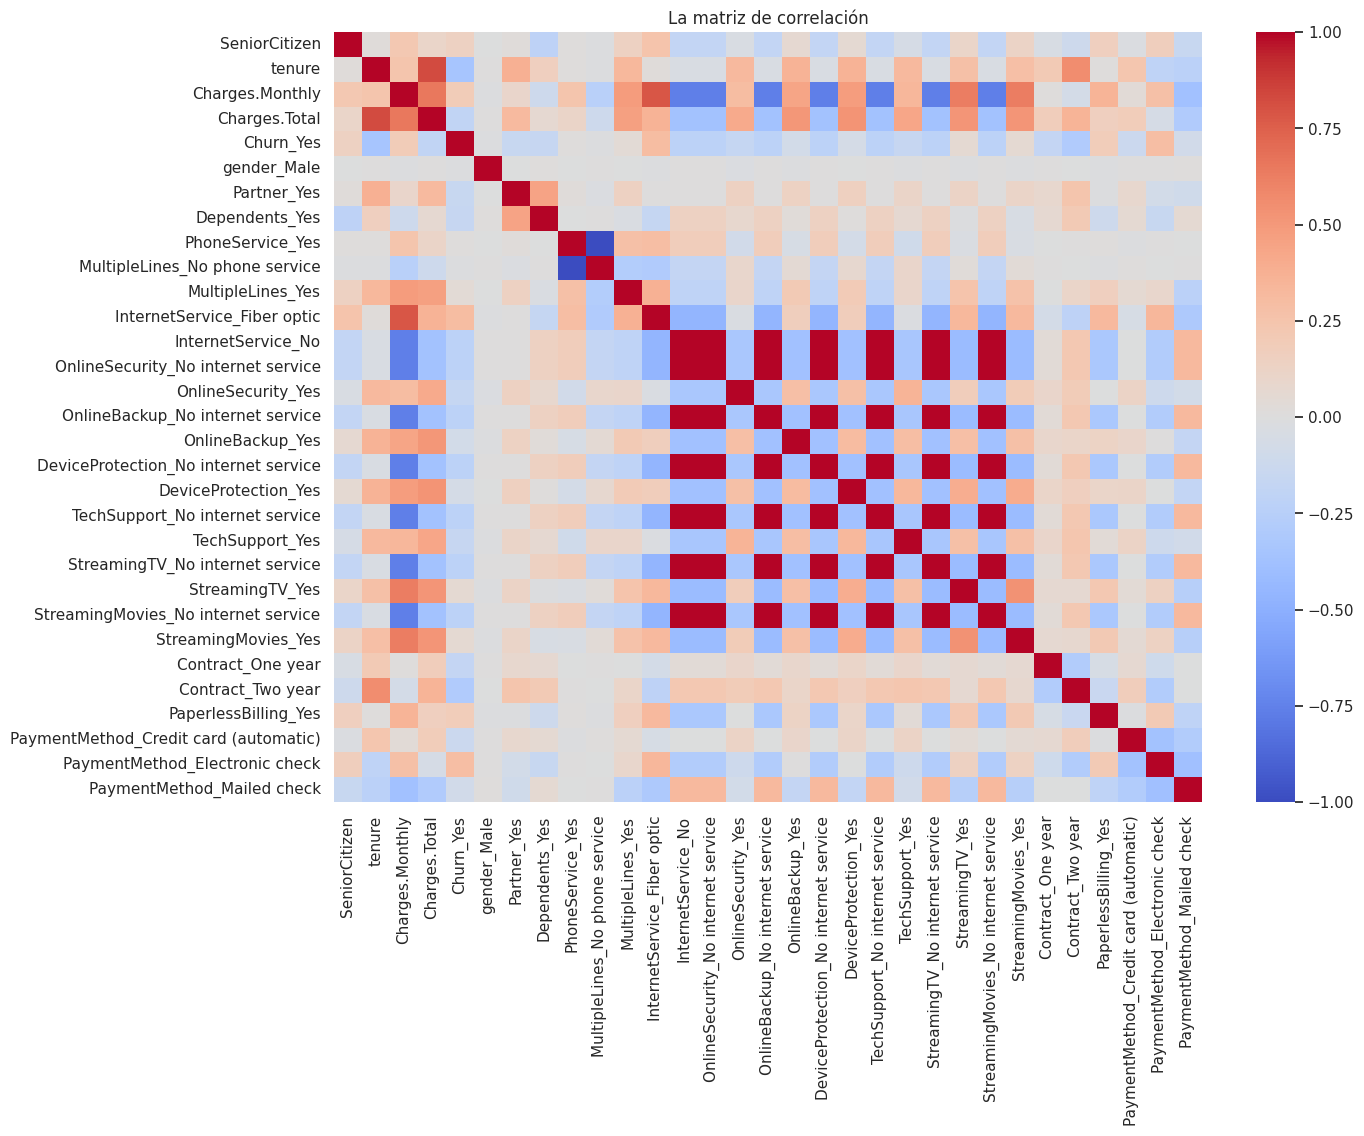

Churn_Yes                                1.000000
InternetService_Fiber optic              0.300949
PaymentMethod_Electronic check           0.294626
Charges.Monthly                          0.189866
PaperlessBilling_Yes                     0.186666
SeniorCitizen                            0.146733
StreamingTV_Yes                          0.062430
StreamingMovies_Yes                      0.060586
MultipleLines_Yes                        0.039343
PhoneService_Yes                         0.012571
gender_Male                             -0.009555
MultipleLines_No phone service          -0.012571
DeviceProtection_Yes                    -0.063452
OnlineBackup_Yes                        -0.080163
PaymentMethod_Mailed check              -0.090061
PaymentMethod_Credit card (automatic)   -0.131085
Partner_Yes                             -0.148546
TechSupport_Yes                         -0.160440
Dependents_Yes                          -0.161384
OnlineSecurity_Yes                      -0.166828


In [22]:
plt.figure(figsize=(14,10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', center=0)
plt.title('La matriz de correlación')
plt.show()
cor_target = df_encoded.corr()['Churn_Yes'].sort_values(ascending=False)
print(cor_target)

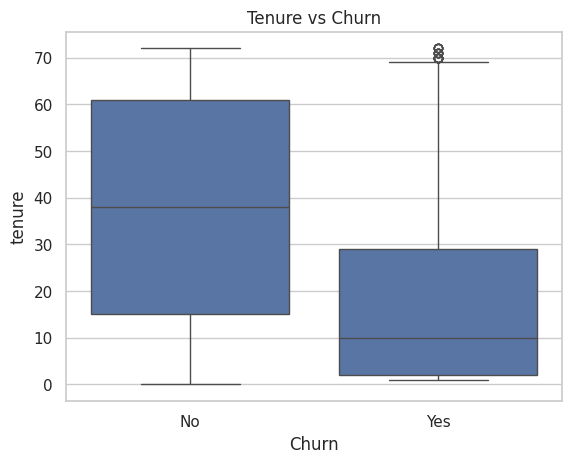

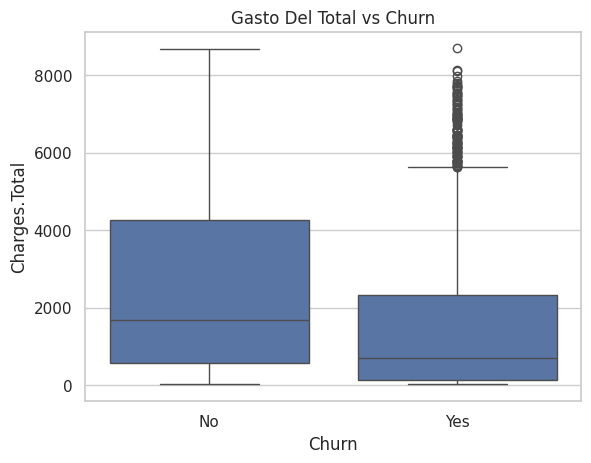

In [23]:
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure vs Churn')
plt.show()
sns.boxplot(data=df, x='Churn', y='Charges.Total')
plt.title('Gasto Del Total vs Churn')
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
scaler_smote = StandardScaler()
X_train_smote_scaled = scaler_smote.fit_transform(X_train_smote)
X_test_smote_scaled = scaler_smote.transform(X_test)

In [11]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_smote_scaled, y_train_smote)


param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(rf, param_dist, n_iter=10, cv=3, scoring='f1', random_state=42, n_jobs=-1)
rf_random.fit(X_train_smote, y_train_smote)
rf_best = rf_random.best_estimator_

xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [12]:
print(' Logistic Regression (umbral=0.50):')
print(classification_report(y_test, lr.predict(X_test_smote_scaled)))
print(confusion_matrix(y_test, lr.predict(X_test_smote_scaled)))

print(' Random Forest:')
print(classification_report(y_test, rf_best.predict(X_test)))
print(confusion_matrix(y_test, rf_best.predict(X_test)))

print(' XGBoost:')
print(classification_report(y_test, xgb.predict(X_test)))
print(confusion_matrix(y_test, xgb.predict(X_test)))

📊 Logistic Regression (umbral=0.50):
              precision    recall  f1-score   support

       False       0.87      0.82      0.84      1620
        True       0.55      0.63      0.59       561

    accuracy                           0.77      2181
   macro avg       0.71      0.73      0.72      2181
weighted avg       0.79      0.77      0.78      2181

[[1331  289]
 [ 206  355]]
📊 Random Forest:
              precision    recall  f1-score   support

       False       0.84      0.85      0.84      1620
        True       0.55      0.52      0.54       561

    accuracy                           0.77      2181
   macro avg       0.69      0.69      0.69      2181
weighted avg       0.76      0.77      0.77      2181

[[1380  240]
 [ 267  294]]
📊 XGBoost:
              precision    recall  f1-score   support

       False       0.84      0.85      0.84      1620
        True       0.55      0.55      0.55       561

    accuracy                           0.77      2181
   macro 

In [14]:
umbral_optimo = 0.35
y_probs = lr.predict_proba(X_test_smote_scaled)[:, 1]
y_pred_umbral = (y_probs >= umbral_optimo).astype(int)
print(f'Evaluación Logistic Regression con umbral {umbral_optimo}:')
print(classification_report(y_test, y_pred_umbral))
print(confusion_matrix(y_test, y_pred_umbral))

Evaluación Logistic Regression con umbral 0.35:
              precision    recall  f1-score   support

       False       0.90      0.72      0.80      1620
        True       0.48      0.76      0.59       561

    accuracy                           0.73      2181
   macro avg       0.69      0.74      0.69      2181
weighted avg       0.79      0.73      0.74      2181

[[1163  457]
 [ 135  426]]


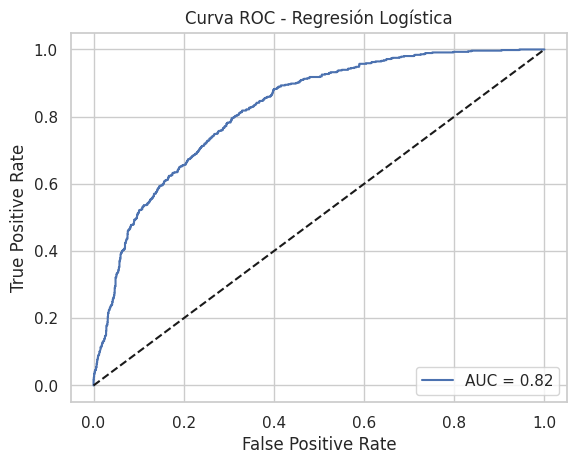

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc='lower right')
plt.show()

In [26]:
lr_importance = pd.Series(lr.coef_[0], index=X.columns).sort_values(ascending=False)
print('Coeficientes - Logistic Regression:')
print(lr_importance.head(10))

Coeficientes - Logistic Regression:
InternetService_Fiber optic       4.033729
PhoneService_Yes                  2.855713
MultipleLines_No phone service    1.633009
StreamingMovies_Yes               1.549694
StreamingTV_Yes                   1.469001
Charges.Total                     1.218406
MultipleLines_Yes                 0.901247
DeviceProtection_Yes              0.729201
OnlineBackup_Yes                  0.645341
PaymentMethod_Electronic check    0.641928
dtype: float64


In [27]:
rf_importance = pd.Series(rf_best.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Coeficientes - Random Forest:')
print(rf_importance.head(10))

Coeficientes - Random Forest:
Charges.Total                     0.171310
tenure                            0.149507
Charges.Monthly                   0.131203
PaymentMethod_Electronic check    0.103112
InternetService_Fiber optic       0.055065
PaperlessBilling_Yes              0.046506
Contract_Two year                 0.041999
MultipleLines_Yes                 0.023923
gender_Male                       0.022541
Contract_One year                 0.019772
dtype: float64


In [28]:
def metricas(y_true, pred):
    report = classification_report(y_true, pred, output_dict=True)
    return [report['accuracy'], report['weighted avg']['precision'], report['weighted avg']['recall'], report['weighted avg']['f1-score']]

resultados = pd.DataFrame(
    index=['Logistic Regression', 'Random Forest', 'XGBoost'],
    columns=['Accuracy', 'Precision', 'Recall', 'F1']
)
resultados.loc['Logistic Regression'] = metricas(y_test, y_pred_umbral)
resultados.loc['Random Forest'] = metricas(y_test, rf_best.predict(X_test))
resultados.loc['XGBoost'] = metricas(y_test, xgb.predict(X_test))
print(resultados)

                     Accuracy Precision    Recall        F1
Logistic Regression  0.728565  0.789621  0.728565  0.743852
Random Forest        0.767538  0.763981  0.767538  0.765632
XGBoost              0.768913  0.768111  0.768913  0.768506
